![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)

# Velocity metrics package illustration: Run Lagrangian Cumulative Distance
 

## Agulhas, BFN-QG
 

***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Agulhas: BFNQG currents maps</center></h1>
 <h5><center> The notebook aims to illustrate how to run the velocity metrics. Here, the example uses surface current maps produced by the BFN-QG in the Agulhas region.</center></h5> 

In [1]:
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.utils.constant as const  

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Parameters

### Output directory

In [3]:
outputdir = '../results/metrics_illustration/'

### Evaluated maps parameters

In [4]:
path_dict_product =  '../nb_run_metrics/data_type_metric_illustration_bfnqg.json'  

depth = 0

### Region parameters

In [5]:
path_dict_region = '../nb_run_metrics/region_metric_illustration_Agulhas.json'

### Advection parameters

In [6]:
path_drifter_param = '../nb_run_metrics/drifters_parameters.ini'

path_drifter_position = '../dc_data/lagrangian_position_pickle/Fictive_pos_Drifters_AOML_region_T1_00m_20190101T000000Z_20200101T000000Z.json' 

first_date = '20190101T000000Z'
last_date = '20190201T000000Z'

advection_days = 10

# 1. Advect drifters 

In [7]:
%%time
_ = drifters.run_all_load_once(path_drifter_param, path_dict_product, path_drifter_position,
                 days_of_advection=advection_days, output_dir=outputdir, region=path_dict_region, 
                 first_date=first_date, last_date=last_date, sdepth=depth)

Percent: [#############################-] 96.77%, , 

100%|██████████| 2340/2340 [02:16<00:00, 17.11it/s] 
Saving pickle in ../results/metrics_illustration/data_type_metric_illustration_bfnqg_region_metric_illustration_Agulhas.pyo


CPU times: user 1min 58s, sys: 4.63 s, total: 2min 2s
Wall time: 2min 18s


# 2. Compute SDE

In [8]:
drifter_list = ['../dc_data/drifter_pickle/Drifters_AOML_region_T1_00m_20190101T000000Z_20200101T000000Z.pyo']

path_artificial_drifters = outputdir+'data_type_metric_illustration_bfnqg_region_metric_illustration_Agulhas.pyo'

outputfilename = 'SDE_region_T1_20190101-20190201'

_ = sde.run(path_artificial_drifters, drifter_list, output_dir=outputdir, output_filename=outputfilename)

100%|██████████| 193/193 [00:02<00:00, 88.33it/s] 


# 3. Plot SDE

<Figure size 432x288 with 0 Axes>

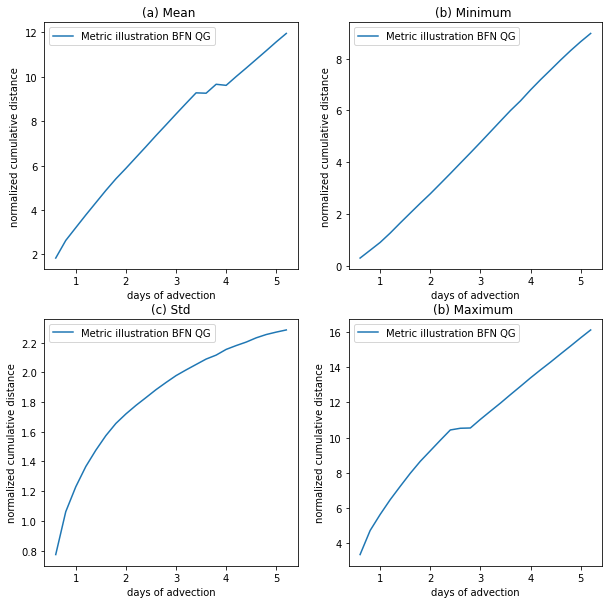

In [9]:
list_sde = [outputdir+'SDE_region_T1_20190101-20190201_BFNQG1.pyo']

outputfilename = 'SDE_BFNQG_region_T1.png'

_ = sde.plot(list_sde, output_dir=outputdir, output_filename=outputfilename)